In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [83]:
path = "R:/IISc/Sem 2/PRNN/Assignments/assignment-3-files/Board/board_data_10.txt"

In [84]:
data = pd.read_csv(path, header=None)

In [85]:
data

,0,1,2
0,-0.9741,-0.5889,3
1,0.9959,-0.7082,2
2,0.7020,0.7082,3
3,0.8805,-0.7997,2
4,-0.1456,-0.2302,3
...,...,...,...
7995,-0.8205,-0.8443,3
7996,0.5034,-0.5708,1
7997,-0.0696,-0.9195,1
7998,0.1179,0.2167,3


In [86]:
X = np.array(data.iloc[:, :2])
y = np.array(data.iloc[:, 2])
y = y.reshape(y.shape[0], 1)

In [87]:
X

array([[-0.9741, -0.5889],
       [ 0.9959, -0.7082],
       [ 0.702 ,  0.7082],
       ...,
       [-0.0696, -0.9195],
       [ 0.1179,  0.2167],
       [-0.3246, -0.2106]])

In [88]:
y

array([[3],
       [2],
       [3],
       ...,
       [1],
       [3],
       [3]], dtype=int64)

In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [90]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()

In [91]:
y

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [93]:
lam = tf.keras.regularizers.l2(l=0)
init = tf.initializers.he_normal()
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, input_dim=2, kernel_initializer=init, kernel_regularizer=lam),
    tf.keras.layers.ReLU(),
    # tf.keras.layers.Dropout(0.2),

    # tf.keras.layers.Dense(32, kernel_initializer=init, kernel_regularizer=lam),
    # tf.keras.layers.ReLU(),
    # tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(16, kernel_initializer=init, kernel_regularizer=lam),
    tf.keras.layers.ReLU(),
    # tf.keras.layers.Dropout(0.2),

    # tf.keras.layers.Dense(64, kernel_initializer=init, kernel_regularizer=lam),
    # tf.keras.layers.ReLU(),

    tf.keras.layers.Dense(4, activation='softmax')
])
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 8)                 24        
_________________________________________________________________
re_lu_10 (ReLU)              (None, 8)                 0         
_________________________________________________________________
dense_28 (Dense)             (None, 16)                144       
_________________________________________________________________
re_lu_11 (ReLU)              (None, 16)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 4)                 68        
Total params: 236
Trainable params: 236
Non-trainable params: 0
_________________________________________________________________


In [94]:
opt = tf.keras.optimizers.Adam(learning_rate=0.1)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.001)
# early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [95]:
history = model.fit(X_train, y_train, epochs=60, batch_size=32, validation_split=0.1, shuffle=True, callbacks=[reduce_lr])

Epoch 1/60
203/203 [==============================] - 2s 6ms/step - loss: 1.0803 - accuracy: 0.5438 - val_loss: 0.6385 - val_accuracy: 0.8319
Epoch 2/60
203/203 [==============================] - 1s 4ms/step - loss: 0.7032 - accuracy: 0.7806 - val_loss: 0.6677 - val_accuracy: 0.8125
Epoch 3/60
203/203 [==============================] - 1s 4ms/step - loss: 0.6796 - accuracy: 0.7968 - val_loss: 0.6811 - val_accuracy: 0.7778
Epoch 4/60
203/203 [==============================] - 1s 4ms/step - loss: 0.6473 - accuracy: 0.8104 - val_loss: 0.6583 - val_accuracy: 0.8111
Epoch 5/60
203/203 [==============================] - 1s 4ms/step - loss: 0.6811 - accuracy: 0.7963 - val_loss: 0.6501 - val_accuracy: 0.8083
Epoch 6/60
203/203 [==============================] - 1s 4ms/step - loss: 0.6611 - accuracy: 0.8093 - val_loss: 0.6195 - val_accuracy: 0.8194
Epoch 7/60
203/203 [==============================] - 1s 4ms/step - loss: 0.6564 - accuracy: 0.8146 - val_loss: 0.7067 - val_accuracy: 0.7764
Epoch 

In [96]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [97]:
from sklearn.metrics import accuracy_score, confusion_matrix
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 87.625


<AxesSubplot:>

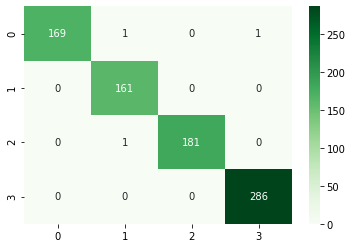

In [70]:
sns.heatmap(confusion_matrix(pred, test), annot=True, fmt='g', cmap='Greens')

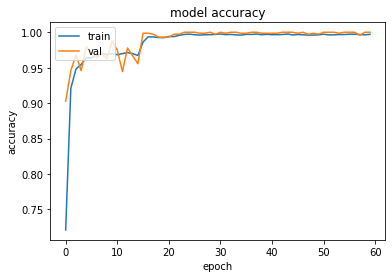

In [71]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

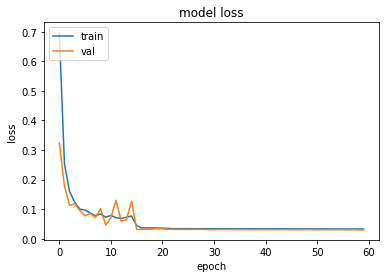

In [72]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()